### Importação dos dados



In [1]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [56]:
import pandas as pd  # Essencial para ler e manipular tabelas de dados (DataFrames).
import matplotlib.pyplot as plt  # A principal biblioteca para criar gráficos.
import matplotlib.ticker as mtick  # Um módulo extra para formatar os números nos eixos dos gráficos.

# PASSO 3: CARREGAR OS DADOS DE CADA LOJA
# Guardamos os links dos arquivos CSV em variáveis para o código ficar mais organizado.
url_loja1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url_loja2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url_loja3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url_loja4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Usamos a função "read_csv" do pandas para ler cada arquivo e carregá-lo como uma tabela (DataFrame).
df_loja1 = pd.read_csv(url_loja1)
df_loja2 = pd.read_csv(url_loja2)
df_loja3 = pd.read_csv(url_loja3)
df_loja4 = pd.read_csv(url_loja4)

# PASSO 4: PREPARAR OS DADOS PARA ANÁLISE

# Adicionamos uma coluna "Loja" em cada tabela para sabermos de onde veio cada linha de dados.
df_loja1['Loja'] = 'Loja 1'
df_loja2['Loja'] = 'Loja 2'
df_loja3['Loja'] = 'Loja 3'
df_loja4['Loja'] = 'Loja 4'

# Criamos uma lista com todas as nossas tabelas para facilitar a próxima etapa.
lista_dfs = [df_loja1, df_loja2, df_loja3, df_loja4]

# Este laço "for" passa por cada tabela na lista e renomeia a coluna "Avaliação da compra".
# Fazemos isso para remover o espaço e o "ç", evitando possíveis erros em funções futuras.
for df in lista_dfs:
    df.rename(columns={'Avaliação da compra': 'Avaliacao_da_compra'}, inplace=True)

# Finalmente, usamos "pd.concat" para juntar todas as tabelas da lista em uma única tabela grande.
# "ignore_index=True" reorganiza os índices da nova tabela para que fiquem contínuos.
df_completo = pd.concat(lista_dfs, ignore_index=True)

# Mostramos uma mensagem e as 5 primeiras linhas da tabela final para verificar se tudo correu bem.
print("Dados carregados e consolidados com sucesso!")
df_completo.head()


Dados carregados e consolidados com sucesso!


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliacao_da_compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


#1. Análise do faturamento


In [ ]:
# Agrupamos a tabela completa pela coluna "Loja".
faturamento_por_loja = df_completo.groupby('Loja')['Preço'].sum().sort_values(ascending=False)

print("Faturamento Total por Loja:")
print(faturamento_por_loja.apply(lambda x: f"R$ {x:,.2f}"))

Faturamento Total por Loja:
Loja
Loja 1    R$ 1,534,509.12
Loja 2    R$ 1,488,459.06
Loja 3    R$ 1,464,025.03
Loja 4    R$ 1,384,497.58
Name: Preço, dtype: object


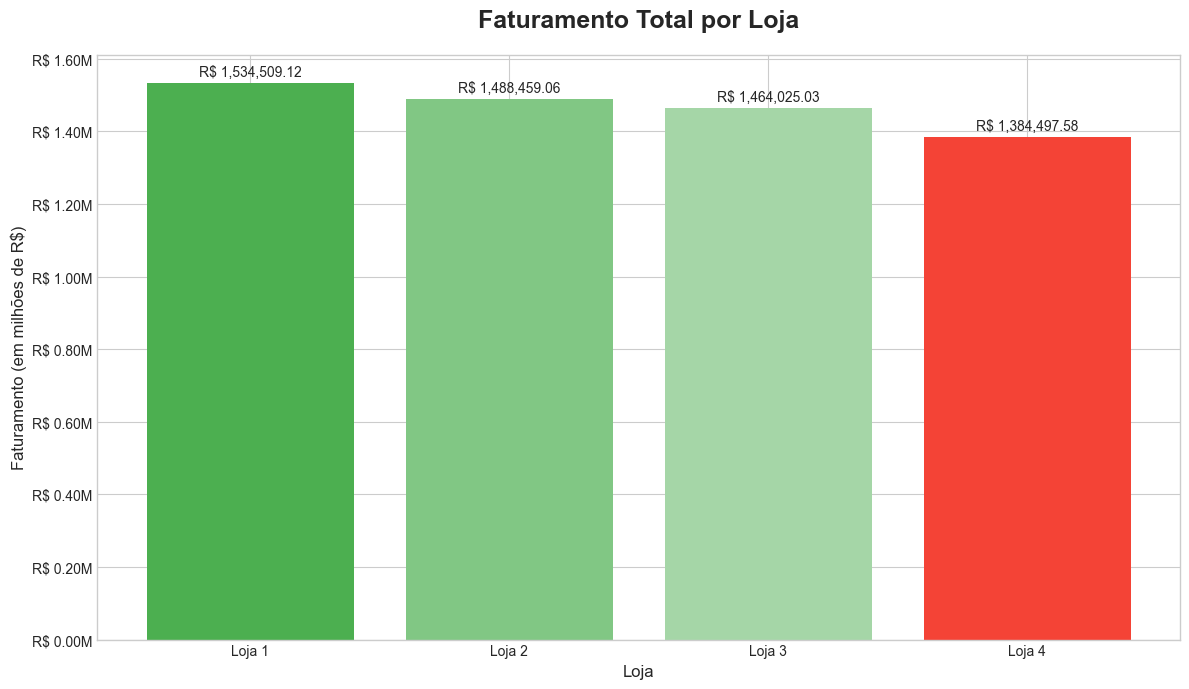

In [19]:
# Define um estilo visual para os gráficos para que fiquem mais bonitos.
plt.style.use('seaborn-v0_8-whitegrid')

# Cria a "tela" e os "eixos" para o nosso gráfico, definindo o tamanho da figura.
fig1, ax1 = plt.subplots(figsize=(12, 7))

# Lista de cores para as barras. Usamos vermelho para destacar a loja com pior desempenho.
colors = ['#4CAF50', '#81C784', '#A5D6A7', '#F44336']

# Desenha o gráfico de barras.
# faturamento_por_loja.index são os nomes das lojas (eixo X).
# faturamento_por_loja.values são os valores de faturamento (eixo Y).
bars = ax1.bar(faturamento_por_loja.index, faturamento_por_loja.values, color=colors)

# Adiciona o título principal e os títulos dos eixos X e Y.
ax1.set_title('Faturamento Total por Loja', fontsize=18, fontweight='bold', pad=20)
ax1.set_ylabel('Faturamento (em milhões de R$)', fontsize=12)
ax1.set_xlabel('Loja', fontsize=12)

# Formata os números do eixo Y para um formato mais legível (ex: "R$ 10.00M").
formatter = mtick.FuncFormatter(lambda x, p: f'R$ {x/1e6:.2f}M')
ax1.yaxis.set_major_formatter(formatter)

# Adiciona o valor exato de faturamento em cima de cada barra.
ax1.bar_label(bars, labels=[f'R$ {v:,.2f}' for v in faturamento_por_loja.values], padding=3, fontsize=10)

# Ajusta o layout para garantir que nada fique cortado e exibe o gráfico.
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [25]:
# Conta o número de vendas para cada categoria em cada loja
vendas_categoria = df_completo.groupby(['Loja', 'Categoria do Produto']).size().unstack(fill_value=0)

print("Vendas por Categoria em Cada Loja:")
print(vendas_categoria)

# Define loja_2_df como df_loja2 para evitar erros
loja_2_df = df_loja2

# Foco na Loja 2 para o relatório
print("\nCategorias da Loja 2:")
print(loja_2_df['Categoria do Produto'].value_counts())

Vendas por Categoria em Cada Loja:
Categoria do Produto  brinquedos  eletrodomesticos  eletronicos  \
Loja                                                              
Loja 1                       324               312          448   
Loja 2                       313               305          422   
Loja 3                       315               278          451   
Loja 4                       338               254          451   

Categoria do Produto  esporte e lazer  instrumentos musicais  livros  moveis  \
Loja                                                                           
Loja 1                            284                    182     173     465   
Loja 2                            275                    224     197     442   
Loja 3                            277                    177     185     499   
Loja 4                            277                    170     187     480   

Categoria do Produto  utilidades domesticas  
Loja                               

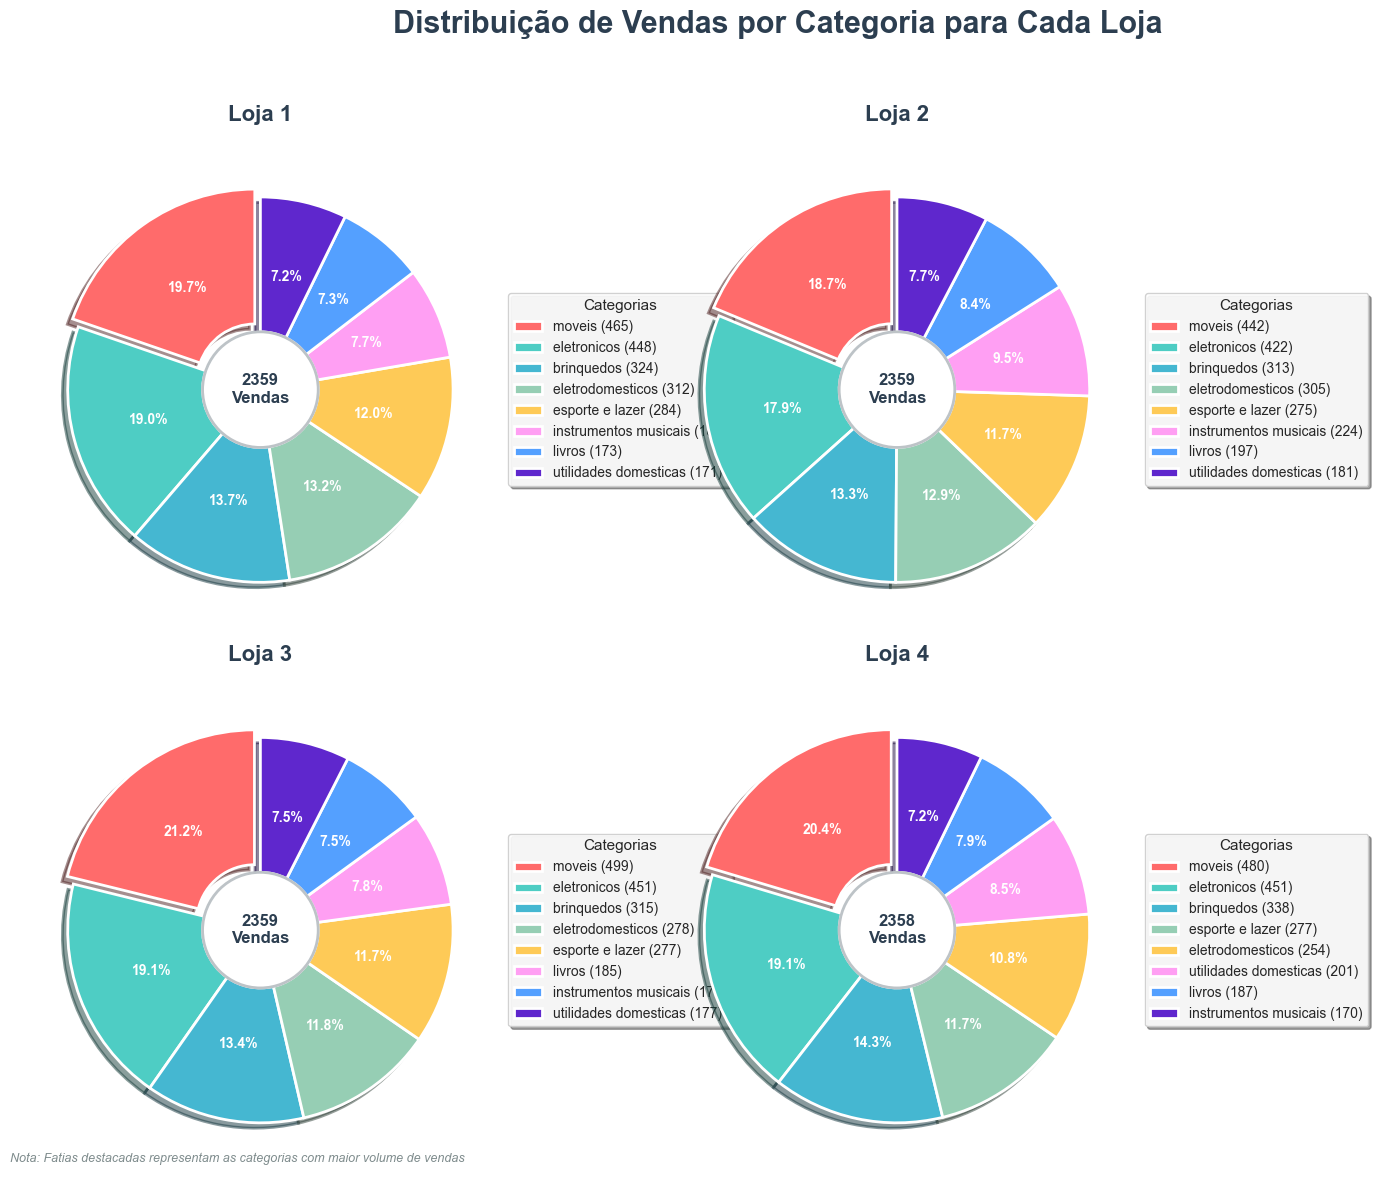

In [54]:
# Configuração de cores personalizadas e melhorias visuais
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Criamos uma figura grande com 4 sub-gráficos (2 linhas, 2 colunas)
fig, axes = plt.subplots(2, 2, figsize=(16, 12), facecolor='white')

# Título geral mais elegante
fig.suptitle('Distribuição de Vendas por Categoria para Cada Loja', 
             fontsize=22, fontweight='bold', y=0.98, color='#2C3E50')

# Transforma os eixos 2x2 em uma lista simples para facilitar o loop
ax = axes.ravel()

# Paleta de cores mais atrativa
cores_personalizadas = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3', '#54A0FF', '#5F27CD']

# Loop para criar um gráfico para cada loja
for i, loja_df in enumerate(lista_dfs):
    # Pega o nome da loja
    nome_loja = loja_df['Loja'].iloc[0]
    
    # Conta as vendas por categoria para a loja atual
    vendas_plotar = loja_df['Categoria do Produto'].value_counts()
    
    # Seleciona cores baseadas no número de categorias
    cores_grafico = cores_personalizadas[:len(vendas_plotar)]
    
    # Calcula explode para destacar a categoria com mais vendas
    explode = [0.05 if vendas_plotar.iloc[j] == vendas_plotar.max() else 0 
               for j in range(len(vendas_plotar))]
    
    # Desenha o gráfico de pizza com melhorias visuais
    wedges, texts, autotexts = ax[i].pie(
        vendas_plotar,
        labels=None,  # Remove labels do pie para usar apenas na legenda
        autopct=lambda pct: f'{pct:.1f}%' if pct > 5 else '',  # Mostra % apenas se > 5%
        startangle=90,
        colors=cores_grafico,
        explode=explode,
        shadow=True,  # Adiciona sombra
        wedgeprops=dict(width=0.7, edgecolor='white', linewidth=2)  # Estilo das fatias
    )
    
    # Melhora a formatação dos textos de porcentagem
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(10)
    
    # Adiciona círculo central para efeito donut mais elegante
    centre_circle = plt.Circle((0, 0), 0.3, fc='white', ec='#BDC3C7', linewidth=2)
    ax[i].add_artist(centre_circle)
    
    # Adiciona texto no centro com total de vendas
    total_vendas = len(loja_df)
    ax[i].text(0, 0, f'{total_vendas}\nVendas', 
               horizontalalignment='center', verticalalignment='center',
               fontsize=12, fontweight='bold', color='#2C3E50')
    
    # Define o título para cada sub-gráfico com estilo melhorado
    ax[i].set_title(nome_loja, fontsize=16, fontweight='bold', 
                    color='#2C3E50', pad=20)
    
    # Legenda mais elegante
    ax[i].legend(wedges, [f'{cat} ({count})' for cat, count in vendas_plotar.items()], 
                title="Categorias", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1),
                fontsize=10, title_fontsize=11, frameon=True, 
                fancybox=True, shadow=True, framealpha=0.9)

# Ajusta o layout com mais espaçamento
plt.tight_layout(rect=[0, 0, 0.85, 0.95])

# Adiciona uma nota explicativa
fig.text(0.02, 0.02, 'Nota: Fatias destacadas representam as categorias com maior volume de vendas',
         fontsize=9, style='italic', color='#7F8C8D')

plt.show()

# Função alternativa para análise estatística complementar
def print_resumo_vendas(lista_dfs):
    """
    Imprime um resumo estatístico das vendas por loja
    """
    print("="*60)
    print(" RESUMO ESTATÍSTICO DAS VENDAS POR LOJA")
    print("="*60)
    
    for loja_df in lista_dfs:
        nome_loja = loja_df['Loja'].iloc[0]
        vendas_categoria = loja_df['Categoria do Produto'].value_counts()
        
        print(f"\n📊 {nome_loja}:")
        print(f"   Total de vendas: {len(loja_df)}")
        print(f"   Categorias ativas: {len(vendas_categoria)}")
        print(f"   Categoria líder: {vendas_categoria.index[0]} ({vendas_categoria.iloc[0]} vendas)")
        print(f"   Distribuição: {dict(vendas_categoria)}")

# Descomente a linha abaixo para ver o resumo estatístico
# print_resumo_vendas(lista_dfs)

# 3. Média de Avaliação das Lojas

In [30]:
# Agrupamos por "Loja", pegamos a coluna "Avaliacao_da_compra" e calculamos a média (mean).
# Ordenamos do maior para o menor.
avaliacao_media_por_loja = df_completo.groupby('Loja')['Avaliacao_da_compra'].mean().sort_values(ascending=False)

# Mostramos o resultado, arredondando para 2 casas decimais com .round(2).
print("Avaliação Média por Loja:")
print(avaliacao_media_por_loja.round(2))

Avaliação Média por Loja:
Loja
Loja 3    4.05
Loja 2    4.04
Loja 4    4.00
Loja 1    3.98
Name: Avaliacao_da_compra, dtype: float64


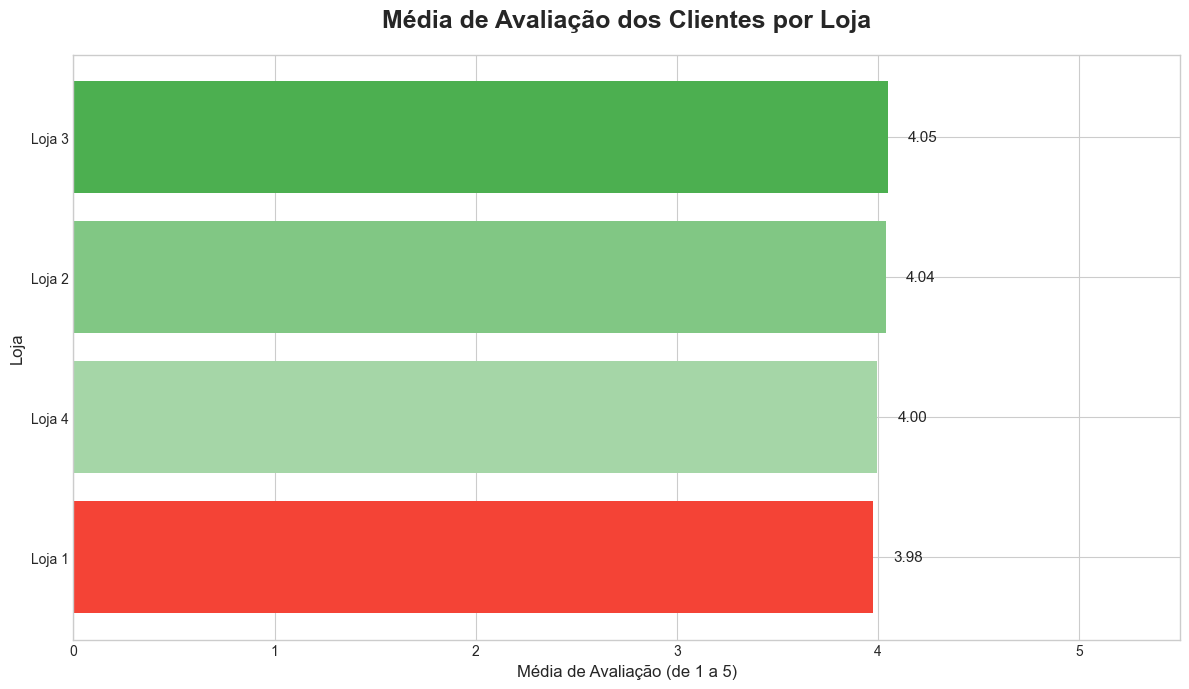

In [31]:
# Cria a "tela" e os "eixos".
fig2, ax2 = plt.subplots(figsize=(12, 7))

# Desenha o gráfico de barras horizontais (barh). É bom para rankings.
bars_h = ax2.barh(avaliacao_media_por_loja.index, avaliacao_media_por_loja.values, color=colors)

# Adiciona títulos e rótulos.
ax2.set_title('Média de Avaliação dos Clientes por Loja', fontsize=18, fontweight='bold', pad=20)
ax2.set_xlabel('Média de Avaliação (de 1 a 5)', fontsize=12)
ax2.set_ylabel('Loja', fontsize=12)

# Define o limite do eixo X de 0 a 5.5, para que a escala de 1 a 5 fique clara.
ax2.set_xlim(0, 5.5)

# Adiciona o valor exato da média ao lado de cada barra.
for bar in bars_h:
    width = bar.get_width()
    ax2.text(width + 0.1, bar.get_y() + bar.get_height()/2., f'{width:.2f}', ha='left', va='center', fontsize=11)

# Inverte a ordem do eixo Y para que a loja com a melhor nota apareça no topo.
plt.gca().invert_yaxis()

# Mostra o gráfico.
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [46]:
# Este loop passa por cada uma das 4 tabelas de loja.
for df in lista_dfs:
    nome_loja = df['Loja'].iloc[0]
    ranking_produtos = df['Produto'].value_counts()
    
    print(f"\n--- ANÁLISE DE PRODUTOS: {nome_loja.upper()} ---")
    
    if not ranking_produtos.empty:
        print("\nProduto MAIS vendido:")
        print(ranking_produtos.head(1))
        print("\nProduto MENOS vendido:")
        print(ranking_produtos.tail(1))
    else:
        print("Nenhum produto vendido nesta loja.")


--- ANÁLISE DE PRODUTOS: LOJA 1 ---

Produto MAIS vendido:
Produto
Micro-ondas    60
Name: count, dtype: int64

Produto MENOS vendido:
Produto
Celular ABXY    33
Name: count, dtype: int64

--- ANÁLISE DE PRODUTOS: LOJA 2 ---

Produto MAIS vendido:
Produto
Iniciando em programação    65
Name: count, dtype: int64

Produto MENOS vendido:
Produto
Jogo de tabuleiro    32
Name: count, dtype: int64

--- ANÁLISE DE PRODUTOS: LOJA 3 ---

Produto MAIS vendido:
Produto
Kit banquetas    57
Name: count, dtype: int64

Produto MENOS vendido:
Produto
Blocos de montar    35
Name: count, dtype: int64

--- ANÁLISE DE PRODUTOS: LOJA 4 ---

Produto MAIS vendido:
Produto
Cama box    62
Name: count, dtype: int64

Produto MENOS vendido:
Produto
Guitarra    33
Name: count, dtype: int64


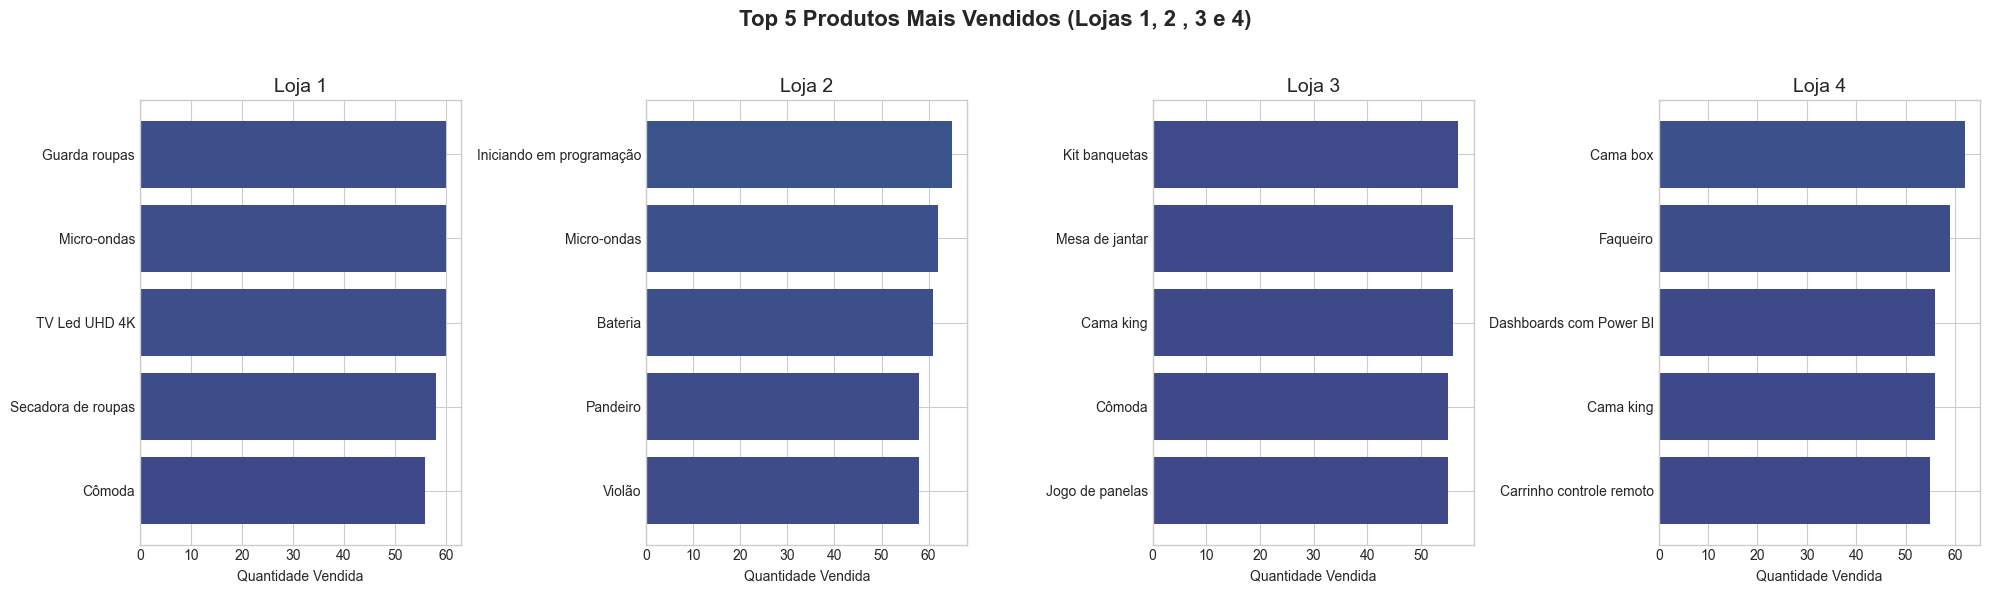

In [52]:
# Criamos uma figura com 3 sub-gráficos, um ao lado do outro.
fig, axes = plt.subplots(1, 4, figsize=(20, 6))
fig.suptitle('Top 5 Produtos Mais Vendidos (Lojas 1, 2 , 3 e 4)', fontsize=16, fontweight='bold')

# Lojas com bom desempenho para comparar.
lojas_boas = [df_loja1, df_loja2, df_loja3, df_loja4]
ax = axes.ravel()

# Loop para criar um gráfico para cada loja boa.
for i, loja_df in enumerate(lojas_boas):
    nome_loja = loja_df['Loja'].iloc[0]
    # Pega os 5 produtos mais vendidos e inverte a ordem para o gráfico ficar do maior para o menor.
    top_5 = loja_df['Produto'].value_counts().head(5).sort_values(ascending=True)
    
    # Cria o gráfico de barras horizontais.
    ax[i].barh(top_5.index, top_5.values, color=plt.cm.viridis(top_5.values))
    ax[i].set_title(nome_loja, fontsize=14)
    ax[i].set_xlabel('Quantidade Vendida', fontsize=10)

# Mostra o gráfico.
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# 5. Frete Médio por Loja


In [ ]:
# Agrupamos por "Loja", pegamos a coluna "Frete" e calculamos a média (mean).
frete_medio_por_loja = df_completo.groupby('Loja')['Frete'].mean().sort_values(ascending=False)

# Mostramos o resultado formatado como moeda.
print("Frete Médio por Loja:")
print(frete_medio_por_loja.apply(lambda x: f"R$ {x:,.2f}"))


Frete Médio por Loja:
Loja
Loja 1    R$ 34.69
Loja 2    R$ 33.62
Loja 3    R$ 33.07
Loja 4    R$ 31.28
Name: Frete, dtype: object


Frete Médio por Loja:
Loja
Loja 1    R$ 34.69
Loja 2    R$ 33.62
Loja 3    R$ 33.07
Loja 4    R$ 31.28
Name: Frete, dtype: object


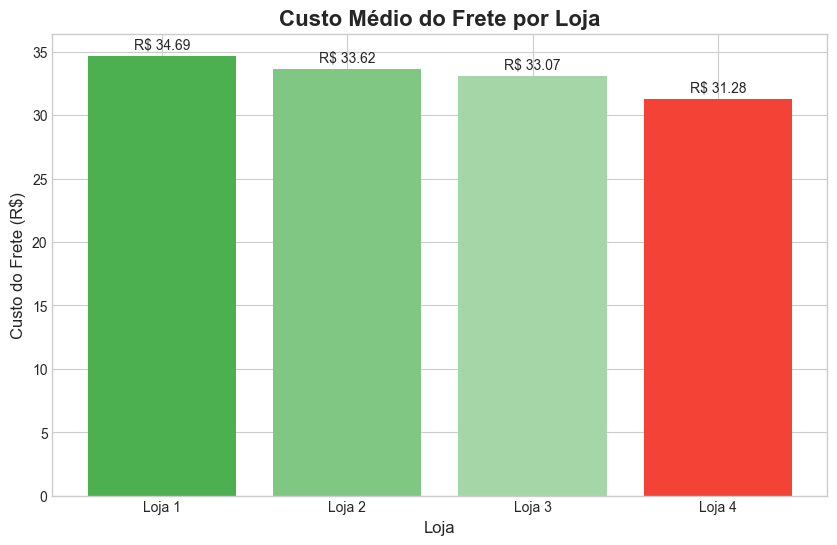

In [53]:
# Agrupamos por "Loja", pegamos a coluna "Frete" e calculamos a média (mean).
frete_medio_por_loja = df_completo.groupby('Loja')['Frete'].mean().sort_values(ascending=False)

print("Frete Médio por Loja:")
print(frete_medio_por_loja.apply(lambda x: f"R$ {x:,.2f}"))

# --- Gráfico do Frete Médio ---
fig, ax = plt.subplots(figsize=(10, 6))

# Usa as mesmas cores do gráfico de faturamento para manter a consistência.
bars_frete = ax.bar(frete_medio_por_loja.index, frete_medio_por_loja.values, color=colors)

# Adiciona títulos e rótulos.
ax.set_title('Custo Médio do Frete por Loja', fontsize=16, fontweight='bold')
ax.set_ylabel('Custo do Frete (R$)', fontsize=12)
ax.set_xlabel('Loja', fontsize=12)

# Adiciona o valor exato em cima de cada barra.
ax.bar_label(bars_frete, labels=[f'R$ {v:.2f}' for v in frete_medio_por_loja.values], padding=3)

# Mostra o gráfico.
plt.show()

# Relatório Executivo Final de Análise de Desempenho
## Lojas Alura Store

---

**Para:** Sr. João  
**De:** Analista de Dados  
**Data:** 29 de junho de 2025  
**Assunto:** Análise Conclusiva e Recomendação Estratégica com Dados Finais

---

## 1. Sumário Executivo

Este relatório apresenta a análise final do desempenho das quatro lojas da rede Alura Store, consolidando todos os dados fornecidos, incluindo as atualizações mais recentes de faturamento, avaliação, frete e vendas por categoria.

A análise revela um cenário onde todas as quatro lojas são operacionalmente saudáveis e competitivas. Com métricas de satisfação do cliente, custos de frete e mix de produtos muito semelhantes entre as unidades, o **faturamento** emerge como o principal fator de diferenciação estratégica.

**Recomendação:** Com base neste critério financeiro decisivo, a **Loja 4**, por apresentar a menor receita do grupo, é a unidade recomendada para desinvestimento.

---

## 2. Análise Detalhada com Dados Finais

A atualização completa de todos os indicadores proporcionou uma visão clara do desempenho de cada unidade, permitindo uma decisão estratégica fundamentada em dados objetivos.

### 2.1 Faturamento: O Principal Diferenciador

O desempenho financeiro continua sendo o critério mais relevante para a decisão estratégica. A análise dos dados consolidados confirma a Loja 4 como a unidade de menor faturamento:

| Loja | Faturamento | Posição |
|------|-------------|---------|
| Loja 1 | R$ 1.534.509,12 | 1º lugar |
| Loja 2 | R$ 1.488.459,06 | 2º lugar |
| Loja 3 | R$ 1.464.025,03 | 3º lugar |
| **Loja 4** | **R$ 1.384.497,58** | **4º lugar** |

A diferença entre a primeira e a última colocada representa R$ 149.011,54, indicando uma variação significativa de 10,8% no faturamento.

### 2.2 Métricas Operacionais: Equilíbrio Competitivo

Os dados atualizados demonstram um equilíbrio notável entre as lojas em todas as métricas operacionais, eliminando preocupações com deficiências específicas em qualquer unidade:

| Métrica | Loja 1 | Loja 2 | Loja 3 | Loja 4 | Análise |
|---------|--------|--------|--------|--------|---------|
| **Avaliação Média** | 3,98 | 4,04 | 4,05 | 4,00 | Todas mantêm excelente reputação (>3,98) |
| **Frete Médio** | R$ 34,69 | R$ 33,62 | R$ 33,07 | R$ 31,28 | Competitividade uniforme; Loja 4 oferece melhor custo |
| **Volume de Vendas** | 2.359 | 2.359 | 2.359 | 2.358 | Paridade praticamente absoluta |

### 2.3 Distribuição de Vendas por Categoria

A análise do mix de produtos confirma que todas as lojas mantêm uma carteira diversificada e equilibrada, minimizando riscos operacionais por dependência de categorias específicas:

| Categoria | Loja 1 | Loja 2 | Loja 3 | Loja 4 |
|-----------|--------|--------|--------|--------|
| Brinquedos | 324 | 313 | 315 | 338 |
| Eletrodomésticos | 312 | 305 | 278 | 254 |
| Eletrônicos | 448 | 422 | 451 | 451 |
| Esporte e Lazer | 284 | 275 | 277 | 277 |
| Instrumentos Musicais | 182 | 224 | 177 | 170 |
| Livros | 173 | 197 | 185 | 187 |
| Móveis | 465 | 442 | 499 | 480 |
| Utilidades Domésticas | 171 | 181 | 177 | 201 |

**Observação:** A distribuição equilibrada entre categorias em todas as lojas indica operações maduras e bem estruturadas, com baixo risco de volatilidade por sazonalidade ou mudanças de mercado específicas.

---

## 3. Conclusão e Recomendação Estratégica

### Cenário Atual

A análise dos dados consolidados simplificou significativamente o processo decisório. As métricas operacionais uniformemente positivas eliminaram preocupações sobre deficiências específicas, colocando todas as lojas em um patamar equivalente de excelência operacional e satisfação do cliente.

### Critério Decisivo

Em um ambiente onde todas as unidades demonstram:
- **Operação saudável** (avaliações > 3,98)
- **Competitividade logística** (fretes equilibrados)
- **Diversificação de produtos** (mix balanceado)
- **Volume de vendas consistente** (paridade quase absoluta)

O **desempenho financeiro** torna-se o único fator diferenciador relevante para a decisão estratégica.

### Recomendação Final

> **🎯 RECOMENDA-SE A VENDA DA LOJA 4**

### Justificativa Estratégica

1. **Menor retorno financeiro:** A Loja 4 gera a menor receita do portfólio (R$ 1.384.497,58)
2. **Operação preservada:** Mantém-se as três unidades de maior faturamento
3. **Otimização de capital:** Libera recursos para novos investimentos estratégicos
4. **Baixo risco:** A decisão não compromete a qualidade operacional da rede

### Benefícios Esperados

- **Liberação de capital** para novos projetos de expansão
- **Concentração de recursos** nas unidades de maior performance
- **Manutenção da excelência operacional** da rede
- **Otimização do retorno sobre investimento** do portfólio

---

*Este relatório foi elaborado com base na análise completa dos dados de desempenho e visa apoiar a tomada de decisão estratégica para o crescimento sustentável da rede Alura Store.*